# <center> Used Car Apparaisal
### Problem statement : "Can we estimate the price of a used car based on its characteristics?"

**Navadeep wants to sell his car. But the problem is, he doesn't know how much he should sell his car for. Navadeep wants to sell his car for as much as he can. But he also wants to set the price reasonably so someone would want to purchase it. So the price he sets should represent the value of the car.**

## Import libraries

In [740]:
# import pandas library
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read Data

In [741]:
# Read the online file by the URL, and assign it to variable "df"
car = pd.read_csv("auto.csv", header=None)

**The dataset used is an open dataset, by Jeffrey C. Schlimmer.This dataset is in CSV format, which separates each of the values with commas**

In [742]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
car.head(5)

The first 5 rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Add Headers**

Take a look at our dataset; pandas automatically set the header by an integer from 0.

To better describe our data we can introduce a header, this information is available at: https://archive.ics.uci.edu/ml/datasets/Automobile

Thus, we have to add headers manually.

Firstly, we create a list "headers" that include all column names in order. Then, we use dataframe.columns = headers to replace the headers by the list we created.

In [743]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [744]:
car.columns = headers
car.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


we can drop missing values along the column "price" as follows

In [745]:
car.dropna(subset=["price"], axis=0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Now, we have successfully read the raw dataset and add the correct headers into the data frame.

In [746]:
print(car.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


**Save Dataset**

In [747]:
#car.to_csv("automobile.csv", index=False)

## Getting Started Analyzing Data

1. Understand the data before you begin any analysis
2. Should check
    - Data types
    - Data Distribution 
    - Using these methods gives an overview of the dataset.
3. Locate potential issues with the data such as the wrong datatype of features, which may need to be resolved later on.

- Data has a variety of types.
- The main types stored in Pandas objects are object, float, int, and datetime.

In [748]:
datatypes = {}
datatypes["Pandas type"] = ["Object","int64","float64","datetime64, timedelta[ns]"]
datatypes["Native python types"]= ["string","int",'float','N/A(but see the datetime module in python library)']
datatypes["Description"]= ["number and string",'Numeric characters','Numeric characyers with decimals','time data']
pd.DataFrame(datatypes)

,Pandas type,Native python types,Description
0,Object,string,number and string
1,int64,int,Numeric characters
2,float64,float,Numeric characyers with decimals
3,"datetime64, timedelta[ns]",N/A(but see the datetime module in python libr...,time data


**Why check datatypes?**
    - Potential info and type mismatch
    - Compatibility with python methods
**There are two reasons to check data types in a dataset.
Pandas automatically assigns types based on the encoding it detects from the original
data table.
For a number of reasons, this assignment may be incorrect.
For example, it should be awkward if the "car price" column, which we should expect to
contain continuous numeric numbers, is assigned the datatype of "object".
It would be more natural for it to have the float type.
we may need to manually change the datatype to float.**

**The second reason is that it allows an experienced data scientist to see which Python functions
can be applied to a specific column.
For example, some math functions can only be applied to numerical data.
If these functions are applied to non-numerical data, an error may result.**

# Why the "dtype" method 

In [749]:
car.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**When the "dtype" method is applied to the data set, the datatype of each columnis returned in a Series.**

- A good data scientist's intuition tells us that most of the data types make sense.
- The make of cars, for example, are names, so this information should be of type object.
- The last one on the list could be an issue. As bore is a dimension of an engine, we should expect a numerical data type to be used. Instead, the object type is used.
- We will have to correct these type mismatches.

# Why "describe()" method

In [750]:
#Returns a statistical summary
car.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


**Now we would like to check the statistical summary of each column to learn about the distribution of data in each column.**
- The statistical metrics can tell the data scientist if there are mathematical issues that may exist, such as extreme outliers and large deviations.
- The data scientist may have to address these issues later.
- To get the quick statistics, we use the describe method.
- It returns the number of terms in the column as "count", average column value as "mean",column standard deviation as "std", the maximum and minimum values, as well as the boundary of each of the quartiles.
- By default, the dataframe.describe() function skips rows and columns that do not contain numbers.
- It is possible to make the describe method work for object-type columns as well.

In [751]:
#Provides full summary statistics
car.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


**To enable a summary of all the columns, we could add an argument include = "all" inside the describe function bracket.**
- Now the outcome shows the summary of all the 26 columns, including object-typed attributes.
- We see that for object-type columns, a different set of statistics is evaluated, like unique, top and frequency.
- "Unique" is the number of distinct objects in the column, 
- "top" is the most frequently occurring object, 
- and "freq" is the number of times the top object appears in the column.
- Some values in the table are shown here as "NaN", which stands for "not a number".
- This is because that particular statistical metric cannot be calculated for that specific column data type.

# Why "info()" method

In [752]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

- Another method you can use to check your dataset is the dataframe.info function.
- This function shows the top 30 rows and bottom 30 rows of the dataframe.

# Data Warngling 


What is the purpose of Data Wrangling?

Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

**contents in data warngling**
 - Pre-processing Data in Python
- Dealing with Missing Values in Python
- Data Formatting in Python
- Data Normalization in Python
- Binning in Python
- Turning categorical into quantitative variables

# Pre-processing data

**data pre-processing techniques.**
- If you’re unfamiliar with the term, data pre-processing is a necessary step in data analysis.
- It is the process of converting or mapping data from one “raw” form into another format to make it ready for further analysis.
- Data pre-processing is also often called “data cleaning” or “data wrangling”, and there are likely other terms.

**Here are the topics that we’ll be covering in this module:**
- How to identify and handle missing values
    - First, we’ll show you how to identify and handle missing values.
    - A “missing value” condition occurs whenever a data entry is left empty.
- Data formatting
    - Then, we’ll cover data formats.
    - Data from different sources may be in various formats, in different units or in various conventions.
    - We will introduce some methods in Python pandas that can standardize the values into the same format, or unit, or convention.
- Data Normalization(centering and scaling)
    - After that, we’ll cover data normalization.
    - Different columns of numerical data may have very different ranges, and direct comparison is often not meaningful.
    - Normalization is a way to bring all data into a similar range, for more useful comparison.
    - Specifically, we’ll focus on the techniques of centering and scaling.
- Data Binning
    - And then, we’ll introduce data binning.
    - Binning creates bigger categories from a set of numerical values.
    - It is particularly useful for comparison between groups of data.
- Turnning  categorical values into numeric variables
    - And lastly, we’ll talk about categorical variables and show you how to convert categorical values into numeric variables to make statistical modeling easier.

**Sample dataframe operation**
- In Python, we usually perform operations along columns; each row of the column represents a sample, i.e., a different used car in the database.
- You access a column by specifying the name of the column.
- For example, you can access "symbolling” and “body-style”; each of these columns is a pandas series.
    - df["symbolling”]  df[“body-style”]
- There are many ways to manipulate dataframes in Python.
- For example, you can add a value to each entry of a column.
- To add 1 to each “symbolling” entry, use this command.
- df['symbolling'] = df['symbolling'] + 1
    - This changes each value of the dataframe column by adding 1 to the current value.

# Dealing with missing values in Python

**The pervasive problem of missing values, as well as strategies on what to do when you encounter missing values in your data.**
- What is missing value
    - When nodata value is stored for a feature for a particular observation, we say this feature has a “missing value”.
- Usually “missing value: in dataset” appears as “?”, “N/A”, 0 or just a blank cell.



In [753]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**In the example here, the “normalized-losses” feature has a “missing value”, which is represented with ?.**

## How to deal with missing data?
- There are many ways to deal with missing values, and this is regardless of Python, R, or whatever tool you use.
- Of course, each situation is different and should be judged differently.
- However, these are the typical options you can consider:

**Check with the data collectrion source**
- The first is to check if the person or group that collected the data can go back and find what the actual value should be.
- Another possibility is just to remove the data where that missing value is found.

**Drop the missing value**
- When you drop data, you can either drop the whole variable or just the single dataentry with the missing value.
    - drop the variable
    - drop the data entry
- If you don’t have a lot of observations with missing data, usually dropping the particular entry is the best.
- If you’re removing data, you want to look to do something that has the least amount of impact.

**Replace the missing value**


Replacing data is better, since no data is wasted.
However, it is less accurate since we need to replace missing data with a guess of what the data should be.

1. Replace it with an average (od similar datapoints)
    - One standard replacement technique is to replace missing values by the average value of the entire variable.
    - As an example, suppose we have some entries that have missing values for the ‘normalized-losses’ column, and the column average for entries with data is 4,500. While there is no way for us to get an accurate guess of what the missing values under the ‘normalized-losses’ column should have been, you can approximate their values using the average value of the column, 4,500.

2. replace it with frequency
    - But what if the values cannot be averaged, as with categorical variables For a variable like ‘fuel-type’, there isn’t an “average” fuel type, since the variable values are not numbers.
    - In this case, one possibility is to try using the mode –the most common, like “gasoline”.

3. replace it based on other function
    - Finally, sometimes we may find another way to guess the missing data.
    - This is usually because the data gatherer knows something additional about the missing data.
    - For example, he may know that the missing values tend to be old cars, and the normalized losses of old cars are significantly higher than the average vehicle.

**Leave it as missing data**

And of course, finally, in some cases, you may simply want to leave the missing data as missing data. For one reason or another, it may be useful to keep that observation, even if some features
are missing.

**Now let’s go into how to drop missing values or replace missing values in Python.**

**DROP missing value**

- To remove data that contains missing values, pandas library has a built-in method called **‘dropna’.**
- Essentially, with the dropna method, you can choose to drop rows or columns that contain missing values, like NaN.
- So you’ll need to specify “axis=0” to drop the rows, or “axis=1” to drop the columns that contain the missing values.

- **use dataframe.dropna()**

In this example, there is a missing value in the “price” column

- Since the price of used cars is what we’re trying to predict in our upcoming analysis,
- we’d have to remove the cars, the rows, that don’t have a listed price.
- It can simply be done in one line of code using **dataframe.dropna().**
- df.dropna(subset=["price"], axis =0, inplace = True)
- Setting the argument “inplace” to “true” allows the modification to be done on the dataset directly.
- “Inplace=True” just writes the result back into the dataframe. This is equivalent to this line of code.

**REPLACE missing value**
- To replace missing values like NaNs with actual values, pandas library has a built in method called ‘replace’, which can be used to fill in the missing values with the newly calculated values.

As an example, 
- assume that we want to replace the missing values of the variable ‘normalized-losses’ by the mean value of the variable.

- Therefore, the missing value should be replaced by the average of the entries within that Column.
- In Python, first we calculate the mean of the column.
    - mean = df['normalized-losses'].mean()
- **df['normalized-losses'].replace(np.nan, mean)**
- Then we use the method “replace”, to specify the value we would like to be replaced as the first parameter, in this case, NaN.
- The second parameter is the value we would like to replace it with: i.e., the mean, in this example.

**This is a fairly simplified way of replacing missing values. There are of course other techniques, such as replacing missing values for the average of the group, instead of the entire dataset. So we’ve gone throug**

# Data Formatting in Python

Here we’ll look at the problem of data with different formats, units, and conventions, and the pandas methods that help us deal with these issues.

Non-formatted:
- Confusing
- Hard to aggregate
- Hard to computer


In [754]:
column1={}
column1["city"]=["NY","Newyork","N.Y","N.Y"]
pd.DataFrame(column1)

,city
0,NY
1,Newyork
2,N.Y
3,N.Y


Formatted:
- More clear
- Easy to aggregate
- Easy to compute

In [755]:
column2={}
column2["city"]=["Newyork","Newyork","Newyork","Newyork"]
pd.DataFrame(column2)

,city
0,Newyork
1,Newyork
2,Newyork
3,Newyork


- Data is usually collected from different places, by different people, which may be stored in different formats.
- Data formatting means bringing data into a common standard of expression that allows users to make meaningful comparisons.
- As a part of dataset cleaning, data formatting ensures that data is consistent and easily understandable.
- Example: 
    - For example, people may use different expressions to represent New York City, such as N.Y., Ny, NY, and New York.
- Sometimes, this “uncleaned” data is a good thing to see.
    - For example, if you’re looking at the different ways people tend to write “New York”, then this is exactly the data that you want.Or if you’re looking for ways to spot fraud, perhaps writing “N dot Y dot” is more likely to predict an anomaly than if someone wrote out “New York” in full.
- But perhaps, more often than not, we just simply want to treat them all as the same entity, or format, to make statistical analyses easier down the road.

## Applying calculation to an entity column

**Referring to our used car dataset, there’s a feature named “city-mpg” in the dataset, which refers to a car fuel consumption in miles per gallon unit.**
- However, you may be someone who lives in a country that uses metric units.
- So you would want to convert those values to L/100km --the metric version.
- To transform mpg to L/100km we need to divide 235 by each value in the city-mpg column.

In Python, this can easily be done in one line of code.
- df['city-mpg'] = 235/df[''city-mpg]
- df.rename(columns={'city_mpg':'city-L/100km'}, inplace = True)

You take the column and set it equal to 235 divided by the entire column.

In the second line of code, rename column name from "city-mpg" to "city-L/100km" using the dataframe.rename() method.

## Incorrect data types
- Sometimes the worg data type is assigned to a feature

In [756]:
car["price"].tail()

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: object

- For a number of reasons, including when you import a dataset into Python, the data type may be incorrectly established.
- For example, here we notice that the assigned data type to the price feature is “object” although the expected data type should really be an integer or float type.
- It is important for later analysis to explore the feature’s data type and convert them to the correct data types; otherwise, the developed models later on may behave strangely, and totally valid data may end up being treated like missing data.

### Data types in python
- There are many data types in pandas.
- object : "A","Hello"  # Objects can be letters or words.
- int64 : 1,2,3 #Int64 are integers.
- float64 : 2.123,365.3,63.999 #And Floats are real numbers.

There are many others that we will not discuss.

## Correcting the data types

To identify a features data type, in Python we can 
- use the **dataframe.dtypes()** method and check the datatype of each variable in a dataframe.

In the case of wrong datatypes, 
- the method **dataframe.astype()** can be used to convert a datatype from one format to another.

For example, using astype(“int”) for the price column, you can convert the object column into an integer type variable.
- **df[price'] = df['price'].astype('int')**

In [757]:
car["price"].dtype


dtype('O')

In [758]:
car.dropna(subset=["price"], axis=0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [759]:
car.replace("?", np.nan, inplace = True)

In [760]:
# simply drop whole row with NaN in "price" column
car.dropna(subset=["price"], axis=0, inplace=True)

In [761]:
car[["price"]]= car[["price"]].astype("int")

In [762]:
car["price"].tail()

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: int32

# Data normalization in Python
- Here, we’ll be talking about data normalization, an important technique to understand in data pre-processing.

In [763]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [764]:
car[['length','width','height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


- When we take a look at the used car data set, we notice in the data that the feature “length” ranges from 150 to 250, while feature “width” and “height” ranges from 50 to 100.
- We may want to normalize these variables so that the range of the values is consistent.
- This normalization can make some statistical analyses easier down the road.

In [765]:
colum = {}
colum['age']=[20,30,40]
colum['income']=[100000,20000,500000]
pd.DataFrame(colum)

,age,income
0,20,100000
1,30,20000
2,40,500000


- Here is another example that will help you understand why normalization is important.
- Consider a dataset containing two features: “age” and “income”, where “age” ranges from 0 to 100, while “income” ranges from 0 to 20,000 and higher.
- “income” is about 1,000 times larger than “age”, and ranges from 20,000 to 500,000.
- So these two features are in very different ranges.
- When we do further analysis, like linear regression, for example, the attribute “income” will intrinsically influence the result more, due to its larger value, but this doesn’t necessarily mean it is more ‘important’ as a predictor.
- So, the nature of the data biases the linear regression model to weigh income more heavily than age.


**To avoid this, we can normalize these two variables into values that range from 0 to 1.**
## Compare the two tables (up one and down one).

In [766]:
colum = {}
colum['age']=[0.2,0.3,0.4]
colum['income']=[0.2,0.04,1]
pd.DataFrame(colum)

,age,income
0,0.2,0.20
1,0.3,0.04
2,0.4,1.00


In [767]:
colum = {}
colum['Not-normalized']=['''"age" and "income" are in diff range''','hard to compare','''"income" will influence the result more''']
colum['Normalized']=["similar value range","similar intrinsic influemce on analytical model",""]
pd.DataFrame(colum)

,Not-normalized,Normalized
0,"""age"" and ""income"" are in diff range",similar value range
1,hard to compare,similar intrinsic influemce on analytical model
2,"""income"" will influence the result more",


### After normalization, both variables now have a similar influence on the models we will build later.

## Methods of normalizing data
- There are several ways to normalize data.
- I will just outline three techniques.

#### Simple Feature scalling
1. Xnew = Xold/Xmax 

#### Min_Max
2. Xnew = Xold - Xmin/Xmax-Xmin 

##### Z-score
3. Xnew = Xold-μ 


- The first method, called “simple feature scaling”, just divides each value by the maximum value for that feature.
    - This makes the new values range between 0 and 1.
- The second method, called “Min-Max”, takes each value, X_old, subtracted from the minimum value of that feature, then divides by the range of that feature.
    - Again, the resulting new values range between 0 and 1.
- The third method is called “z-score” or “standard score”. In this formula, for each value, you subtract the Mu which is the average of the feature, and then divide by the standard deviation (sigma).
    - The resulting values hover around 0, and typically range between -3 and +3, but can be higher or lower.

**Following our earlier example, we can apply the normalization method on the “length” feature.**

In [768]:
car[['length','width','height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


#### Simple Feature scalling
- First, we use the simple feature scaling method, where we divide it by the maximum value in the feature.
- Using the pandas method “max”, this can be done in just one line of code.

In [769]:
car1= car [['length']]
car1 =car['length']/car['length'].max()
pd.DataFrame(car1).head()

,length
0,0.811148
1,0.811148
2,0.822681
3,0.848630
4,0.848630


#### Min-max
- Here’s the Min-max method on the “length” feature.
- We subtract each value by the minimum of that column, then divide it by the range of that column: the max minus the min.

In [770]:
car2= car [['length']]
car2 =(car['length']-car['length'].min())/(car['length'].max()-car['length'].min())
pd.DataFrame(car2).head()

,length
0,0.413433
1,0.413433
2,0.449254
3,0.529851
4,0.529851


#### Z-score
- Finally we apply the Z-score method on length feature to normalize the values.
- Here, we apply the mean() and std() method on the length feature.
- mean() method will return the average value of the feature in the dataset, and std() method will return the standard deviation of the features in the dataset.

In [771]:
car3= car [['length']]
car3 =(car['length']-car['length'].mean())/(car['length'].std())
pd.DataFrame(car3).head()

,length
0,-0.438315
1,-0.438315
2,-0.243544
3,0.194690
4,0.194690


In [772]:
car[['length','width','height']].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


# Binning in Python
- Here, we’ll talk about binning as a method of data pre-processing.


1. Binning: grouping of values nto "bins"
2. Convert numberic into categorical variables
3. Group a set of numerical values into a set of "bins"
4. "price" is afeature reange from 5,000 to 45,500 (in order to have a **better representation** of price)

price: 5000,10000,12000,12000,...30000,31000,...    39000,44000,44500

bins:........low...................mid.............high

- Binning is when you group values together into bins. 
- For example, you can bin “age” into [0 to 5], [6 to 10], [11 to 15] and so on.
- Sometimes, binning can improve accuracy of the predictive models.
- In addition, sometimes we use data binning to group a set of numerical values into a smaller number of bins to have a better understanding of the data distribution.
- As example, “price” here is an attribute range from 5,000 to 45,500.
- Using binning, we categorize the price into three bins: low price, medium price, and high prices.

In [773]:
pricebin =  {}
pricebin['price']= [5000,10000,12000,12000,"-",3000,31000,"-",39000,44000,445000]
pricebin['bins'] = ['|','low','|','|','|','Mid','|','|','|','High','|']
pd.DataFrame(pricebin)

,price,bins
0,5000,|
1,10000,low
2,12000,|
3,12000,|
4,-,|
5,3000,Mid
6,31000,|
7,-,|
8,39000,|
9,44000,High


In [774]:
print(pd.DataFrame(car['price'].head(10)))
print("min: ",car[['price']].min())
print("max: ",car[['price']].max())


    price
0   13495
1   16500
2   16500
3   13950
4   17450
5   15250
6   17710
7   18920
8   23875
10  16430
min:  price    5118
dtype: int32
max:  price    45400
dtype: int32


- In the actual car dataset, ”price" is a numerical variable ranging from 5188 to 45400, it has 201 unique values.
- We can categorize them into 3 bins: low, medium, and high-priced cars.
- In Python we can easily implement the binning: We would like 3 bins of equal binwidth, so
- we need 4 numbers as dividers that are equal distance apart.
- First we use the numpy function “linspace” to return the array “bins” that contains 4 equally spaced numbers over the specified interval of the price.


In [775]:
bins = np.linspace(min(car["price"]),max(car["price"]),4)

- We create a list “group_names “ that contains the different bin names.

In [776]:
groups_name = ["Low","Medium","High"]

- We use the pandas function ”cut” to segment and sort the data values into bins.

In [777]:
car['price-binding'] = pd.cut(car['price'],bins,labels=groups_name, include_lowest=True)

In [778]:
car[['price','price-binding']]

,price,price-binding
0,13495,Low
1,16500,Low
2,16500,Low
3,13950,Low
4,17450,Low
...,...,...
200,16845,Low
201,19045,Medium
202,21485,Medium
203,22470,Medium


- You can then use histograms to visualize the distribution of the data after they’ve been divided into bins.
- This is the histogram that we plotted based on the binning that we applied in the price feature.
- From the plot, it is clear that most cars have a low price, and only very few cars have high price.


In [779]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

Text(0.5, 1.0, 'price bins')

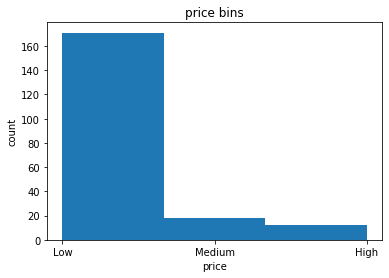

In [780]:
#plt.figure(figsize=(20,6))
plt.pyplot.hist(car['price-binding'], bins = 3)
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

# Turning categorical variables into quantitative variables in Python
- Here, we’ll discuss how to turn categorical variables into quantitative variables in Python.

## Categorical variable

**problem:**
- Most statistical models cannot take in objects or strings as input and, for model training, only take the numbers as inputs.

In [781]:
car_fuel = {}
car_fuel['Car']= ["A","B","C","D"]
car_fuel['Fuel']= ["gas","diesel","gas","gas"]
car_fuel['...']= ["...","...","...","..."]
pd.DataFrame(car_fuel)

,Car,Fuel,...
0,A,gas,...
1,B,diesel,...
2,C,gas,...
3,D,gas,...


**In the car dataset, the "fuel-type" feature as a categorical variable has two values, "gas" or "diesel”, which are in String format.**

In [782]:
car['fuel-type'].head()

0    gas
1    gas
2    gas
3    gas
4    gas
Name: fuel-type, dtype: object

**For further analysis, we has to convert these variables into some form of numeric format.**

## Categorical --> Numeric

**Soliution**
1. add dummy variables for each unique category
2. assign 0 or 1 in each category

- We encode the values by adding new features corresponding to each unique element in the original feature we would like to encode.


In [783]:
car_fuel = {}
car_fuel['Car']= ["A","B","C","D"]
car_fuel['Fuel']= ["gas","diesel","gas","gas"]
car_fuel['...']= ["...","...","...","..."]
car_fuel['gas']= [1,0,1,1]
car_fuel['diesel']= [0,1,0,0]
pd.DataFrame(car_fuel)

,Car,Fuel,...,gas,diesel
0,A,gas,...,1,0
1,B,diesel,...,0,1
2,C,gas,...,1,0
3,D,gas,...,1,0


- In the case where the feature “Fuel” has two unique values, gas and diesel, we create two new features ‘gas’ and ‘diesel.'
- When a value occurs in the original feature we set the corresponding value to one in the new feature; the rest of the features are set to zero.
- In the fuel example, for car B, the fuel value is diesel.
- Therefore, we set the feature diesel equal to one and the gas feature to zero.
- Similarly, for car D the fuel value is gas.
- Therefore we set the feature gas equal to one and the feature diesel equal to zero.

**This technique is often called “one-hot encoding”.**

## Dummy variables in python
- Use pandas.get_dummies() method
- convert categorical aribale to dummy variables (0 or 1)

In [784]:
car_fuel = {}

car_fuel['Fuel']= ["gas","diesel","gas","gas"]

pd.DataFrame(car_fuel)

,Fuel
0,gas
1,diesel
2,gas
3,gas


- In pandas, we can use get_dummies() method to convert categorical variables to dummy variables.
- In Python, transforming categorical variables to dummy variables is simple.
- pd.get_dummies(df['fuel'])
- Following the example, pd.get_dummies() method gets the fuel-type column and creates the dataframe"dummy_variable_1".
- The get_dummies() method automatically generates a list of numbers, each one corresponding to a particular category of the variable.


In [785]:
car_fuel = {}
car_fuel['gas']= [1,0,1,1]
car_fuel['diesel']= [0,1,0,0]
pd.DataFrame(car_fuel)

,gas,diesel
0,1,0
1,0,1
2,1,0
3,1,0


# Exploratory Data Analysis 


Here, we’re going to cover the basics of Exploratory Data Analysis using Python.

Exploratory Data Analysis, or in short “EDA”, is an approach to analyze data in order to:
- summarize main characteristics of the data 
- gain better understanding of the dataset,
- uncover relationships between different variables, and
- extract important variables for the problem we are trying to solve.

Question?

The main question we are trying to answer here is:

**“What are the characteristics that have the most impact on the car price?”**

- We will be going through a couple of different useful exploratory data analysis techniques in order to answer this question.

Here you will learn about: 
- **Descriptive Statistics**
    - which describe basic features of a dataset and obtains a short summary about the sample and measures of the data.
- **Groupby**
    - Basic of Grouping Data using group by, and how this can help to transform our dataset.
- **ANOVA** 
    - The analysis of variance, a statistical method in which the variation in a set of observations is divided into distinct components.
- **Correlation**
    - The Correlation between different variables.
- **Correlation-statistical**
    - And lastly, Advanced Correlation, where we’ll introduce you to various correlation statistical methods, namely Pearson Correlation and Correlation Heatmaps.

# 1. Descriptive Statistics

- When you begin to analyze data, it’s important to first explore your data before you spend time building complicated models. - One easy way to do so is to calculate some descriptive statistics for your data. 
- Descriptive statistical analysis helps to
    - describe basic features of a dataset 
    - and obtains a short summary about the sample and measures of the data. 

## Let’s show you a couple different useful


###  Descriptive Statistics - Describe()

**df.describe()**
- One way in which we can do this is by using the describe() function in pandas. 
- Using the describe function and applying it on your dataframe, the "describe" function automatically computes basic statistics for all numerical variables. 
- It shows the mean, the total number of data points, the standard deviation, the quartiles and the extreme values. 
- Any NaN values are automatically skipped in these statistics. 
- This function will give you a clearer idea of the distribution of your different variables. 

In [786]:
car.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


### Descriptive Statistics - Value_Counts()

You could have also categorical variables in your dataset
- Summarize the categorical data is by using the **value_counts()** method

- These are variables that can be divided up into different categories, or groups and have discrete values. 
- For example, in our dataset we have the drive system as a categorical variable, which consists of the categories: 
    - forward-wheel drive, 
    - rear-wheel drive, 
    - and four-wheel drive. 
- One way you can summarize the categorical data is by using the function value_counts()

In [787]:
drive_wheels_counts = car["drive-wheels"].value_counts().to_frame()

In [788]:
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [789]:
drive_wheels_counts.index.name = 'drive-wheels'
pd.DataFrame(drive_wheels_counts)

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


- We can change the name of the column to make it easier to read. 
- We see that we have 
    - 118 cars in the fwd (front wheel drive) category, 
    - 75 cars in the rwd (rear wheel drive) category,
    - and 8 cars in the 4wd (four wheel drive) category.

### Descriptive Statistics - BoxPlot

- Boxplots are a great way to visualize numeric data, since you can visualize the various distributions of the data.
- The main features that the boxplot shows are the 
    - median of the data, which represents where the middle datapoint is. 
    - The Upper Quartile shows where the 75th percentile is, 
    - the Lower Quartile shows where the 25th percentile is. 
    - The data between the Upper and Lower Quartile represents the Interquartile Range.
    - Next, you have the Lower and Upper Extremes. These are calculated as 1.5 times the interquartile range above the 75th percentile, and as 1.5 times the IQR below the 25th percentile.
    - Finally, boxplots also display outliers as individual dots that occur outside the upper and lower extremes. 
    - With boxplots, you can easily spot outliers and also see the distribution and skewness of the data.
- Boxplots make it easy to compare between groups. 

**example of box plot image**

https://www.google.com/url?sa=i&url=http%3A%2F%2Fvisualoop.com%2Fblog%2F32470%2Fa-look-at-box-plots&psig=AOvVaw34cSASc6PSyrn14ULKhCiM&ust=1613883433251000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCPiGkbjW9-4CFQAAAAAdAAAAABAN



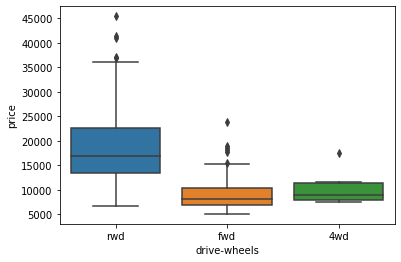

In [790]:
import seaborn as sns
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=car)

In this example, 
- using Boxplot we can see the distribution of different categories of the “drive-wheels” feature over price feature. 
- We can see that the distribution of price between the rwd (rear wheel drive) and the other categories are distinct, but the price for fwd (front wheel drive) and 4wd (four wheel drive) are almost indistinguishable.


###  Descriptive Statistics - Scatter plot
- Often times we tend to see continuous variables in our data. 
- These data points are numbers contained in some range.
- **Each observation in a scatter plot is represented as a point.**
- **This plot shows the relationship between two variables**

For example, in our dataset, price and engine size are continuous variables. 
What if we want to understand the relationship between “engine size” and ”price”? Could engine size possibly predict the price
of a car? One good way to visualize this is using a scatter plot. 
- **Each observation in a scatter plot is represented as a point.**
- **This plot shows the relationship between two variables:**
- The predictor variable: 
    - is the variable that you are using to predict an outcome. In this case, our predictor variable is the engine size.
- The target variable: 
    - is the variable that you are trying to predict. 
- In this case, our target variable is the price, since this would be the outcome.
- In a scatterplot, we typically set the **predictor variable on the x-axis**, or horizontal axis and we set the **target variable on the y-axis** or vertical axis.



(0, 55966.93603557677)

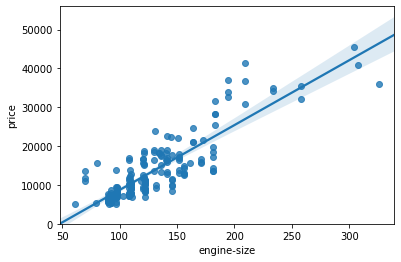

In [791]:
import numpy
import matplotlib.pyplot as plt
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=car)
plt.ylim(0,)

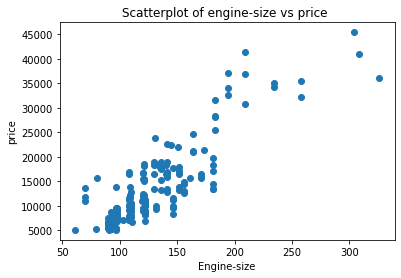

In [792]:
import numpy
import matplotlib.pyplot as plt

x = car['engine-size']
y = car['price']
plt.scatter(x, y)

plt.title("Scatterplot of engine-size vs price ")
plt.xlabel("Engine-size")
plt.ylabel("price")
plt.show()

- In this case, we will thus plot the engine size on the x-axis and the price on the y-axis.
- We are using the Matplotlib function “scatter” here, taking in x and a y variable.
- Something to note is that it’s always important to label your axes and write a general plot title, so that you know what you are looking at.
- Now how is the variable Engine Size related to Price? From the scatterplot we see that as the engine size goes up, the price of the car also goes up.
- This is giving us an initial indication that there is a positive linear relationship between these two variables.

# 2. GroupBy in Python
Here, we’ll cover the basics of grouping and how this can help to transform our dataset.

Assume you want to know: 
- Is there any relationship between the different types of “drive system” (forward, rear and four-wheel drive) and the “price” of the vehicles?
- If so, which type of “drive system” adds the most value to a vehicle?
- It would be nice if we could group all the data by the different types of drive wheels, and compare the results of these different drive wheels against each other.

In pandas this can be done using the group by method.
- DataFrame.groupby()

The group by method is used on 
- categorical variables, 
- groups the data into subsets according to the different categories of that variable.
- You can group by a single variable 
- or you can group by multiple variables by passing in multiple variable names.

## groupby() example

In [793]:
df_test= car[['drive-wheels','body-style','price']]
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index = False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


As an example, let’s say we are interested in finding the average price of vehicles and observe how they differ between different types of “body styles” and “drive wheels” variables.
- To do this, we first pick out the three data columns we are interested in, which is done in the **first line of code.**
- We then group the reduced data according to ‘drive wheels’ and ‘body style’ in the **second line.**
- Since we are interested in knowing how the average price differs across the board, we can take the mean of each group and append this bit at the very **end of line 2.**
- The data is now grouped into subcategories and only the average price of each subcategory is shown.

- We can see that, according to our data, rear wheel drive convertibles and rear wheel drive hardtops have the highest value, while four wheel drive hatchbacks have the lowest value.


#### A table of this form isn’t the easiest to read, and also not very easy to visualize.
#### To make it easier to understand, we can transform this table to a pivot table by using the pivot method.

### pandas method- Pivot() 

In [794]:
df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

- In the previous table, both ‘drive wheels’ and ‘body style’ were listed in columns.
**pivot()**
- A pivot table has one variable displayed along the columns and the other variable displayed along the rows.
- df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')
- Just with one line of code and by using the pandas pivot method, we can pivot the “body style” variable so it is displayed along the columns and the “drive wheels” will be displayed along the rows.
- The price data now becomes a rectangular grid, which is easier to visualize.
- This is similar to what is usually done in Excel spreadsheets.


### Heatmap
- Another way to represent the pivot table is using a heatmap plot.
- Heat map takes a rectangular grid of data and assigns a color intensity based on the data value at the grid points.
- It is a great way to plot the target variable over multiple variables and through this get visual clues of the relationship between these variables and the target.


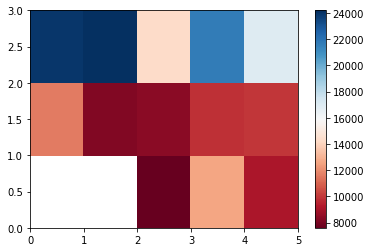

In [795]:
plt.pcolor(df_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

In this example, 
- we use pyplot’s pcolor method to plot a heat map and convert the previous pivot table into a graphical form.
- We specified the Red-blue color scheme.
- In the output plot, each type of “body style” is numbered along the x-axis, and each type of “drive wheels” is numbered along the y-axis.
- The average prices are plotted with varying colors based on their values, according to the color bar.
- We see that the top section of the heat map seems to have higher prices than the bottom section.

## 3 .Analysis of Variance ANOVA

Here, we'll study Analysis of Variance.

- Assume that we want to analyze a categorical variable and see the correlation among different categories.
- For example, consider the car dataset, the question we may ask is, how different categories of the Make feature (as a categorical variable) has impact on the price?

    - Statastical comparison of groups 
    - example : average price of diffrent vehicle makes

In [796]:
df_sorted= car.sort_values('make')
df_sorted

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binding
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Low
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Low
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Low
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,mpfi,3.62,3.15,7.5,162,5100,17,22,18950,Medium
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,Low
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,Medium
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,Medium


In [797]:
df_avg= car[["make","price"]]
car1 = df_avg.groupby(['make'],as_index= False).mean()
car1

,make,price
0,alfa-romero,15498.333333
1,audi,17859.166667
2,bmw,26118.750000
3,chevrolet,6007.000000
4,dodge,7875.444444
5,honda,8184.692308
6,isuzu,8916.500000
7,jaguar,34600.000000
8,mazda,10652.882353
9,mercedes-benz,33647.000000


Text(0.5, 1.0, 'AVG price')

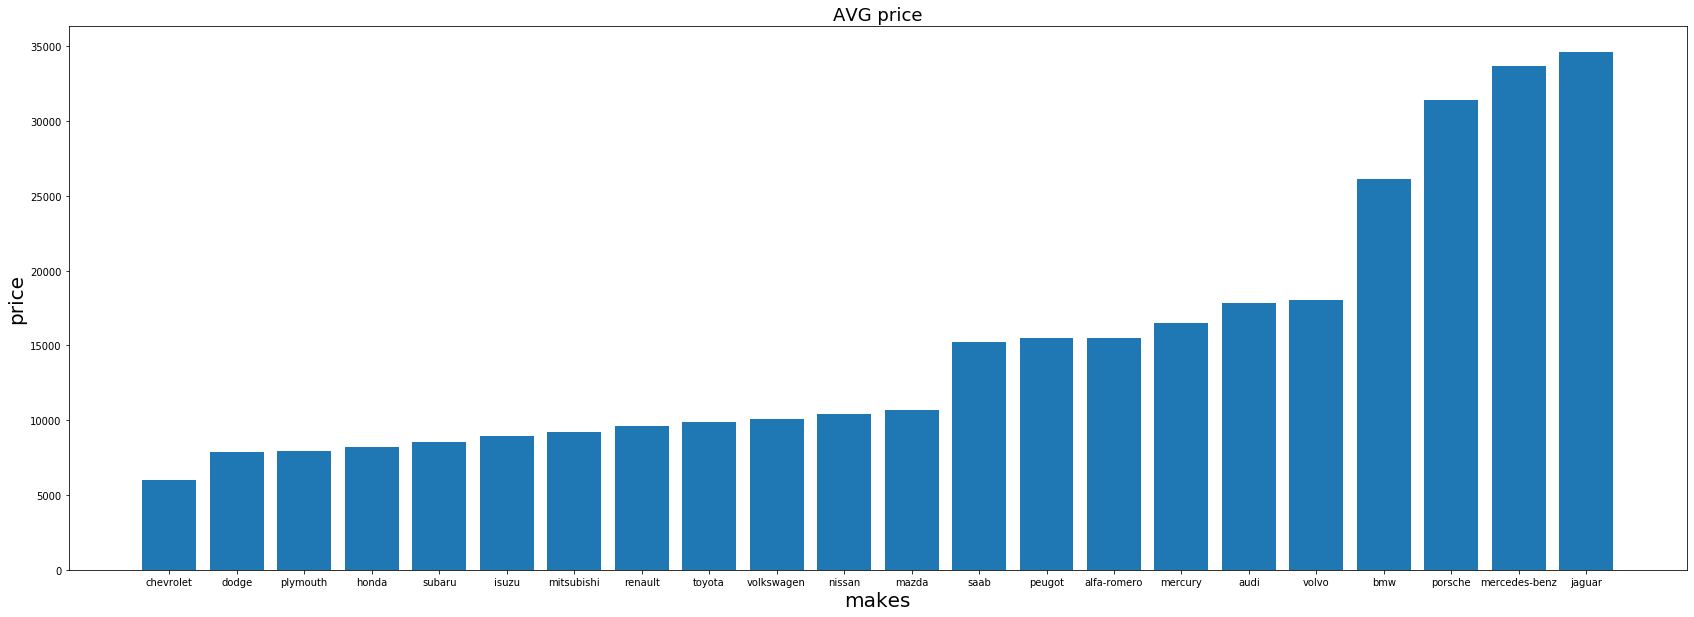

In [798]:
df_avg= car[["price","make"]]
car1 = df_avg.groupby(['make'],as_index= False).mean()
car2 = car1.sort_values('price')
plt.figure(figsize=(29,10))
#bar plot with matplotlib
plt.bar('make', 'price',data=car2)
plt.xlabel("makes", size=20)
plt.ylabel("price", size=20,)
plt.title("AVG price", size=18)


- The diagram shows the average price of different vehicle makes.
- We do see a trend of increasing prices as we move right along the graph.
- But which category in the make feature has the most and which one has the least impact on the car price prediction?
- To analyze categorical variables such as the "make" variable, we can use a method such as the **ANOVA method.**

### ANOVA 
- ANOVA is a statistical test that stands for "Analysis of Variance".
### Why do we perform anova?
- ANOVA can be used to find the correlation between different groups of a categorical variable.
### What we obtain from anova?
- According to the car dataset, we can use ANOVA to see if there is any difference in mean price for the different car makes such as Subaru and Honda.
- The ANOVA test returns two values: the F-test score and the p-value.
- F-test score:
    - The F-test calculates the ratio of variation between the groups's mean over the variation within each of the sample groups.
- p-value score:
    - The p-value shows whether the obtained result is statistically significant.


Text(0.5, 1.0, 'AVG price')

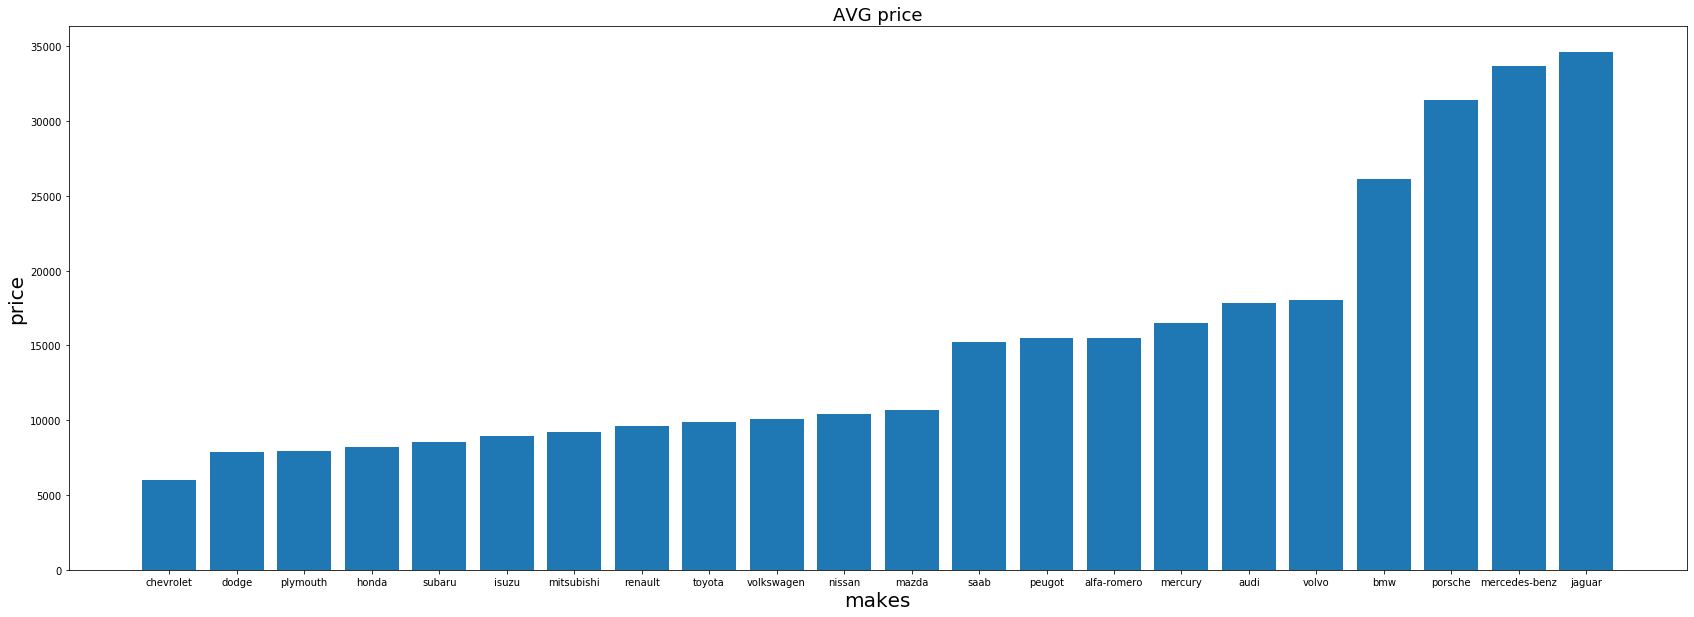

In [799]:
df_avg= car[["price","make"]]
car1 = df_avg.groupby(['make'],as_index= False).mean()
car2 = car1.sort_values('price')
plt.figure(figsize=(29,10))
#bar plot with matplotlib
plt.bar('make', 'price',data=car2)
plt.xlabel("makes", size=20)
plt.ylabel("price", size=20,)
plt.title("AVG price", size=18)


- Getting back to our example, the bar chart shows the average price for different categories of the make feature.
- As we can see from the bar chart, we expect a small F-score between "Hondas" and "Subarus" because there is a small difference between the average prices.
- On the other hand, we can expect a large F-value between Hondas and Jaguars because the differences between the prices is very significant.
- However, from this chart we do not know the exact variances, so let's perform an ANOVA test to see if our intuition is correct.

**ANOVA**

**ANOVA between "Honda" and "Subaru"**

In [800]:
from scipy import stats
df_anova = car[["make","price"]]
grouped_anova = df_anova.groupby(['make'])
anova_result = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price']) 
anova_result

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

- In the first line we extract the make and price data.
- Then, we'll group the data by different makes.
- The ANOVA test can be performed in Python using the f_oneway method as the built-in function of the Scipy package.
- We pass in the price data of the two car make groups that we want to compare and it calculates the ANOVA results.
- The results confirm what we guessed at first.
- The prices between Hondas and Subarus are not significantly different, as the F-test score is less than 1 and p-value is larger than 0.05.

**ANOVA between "Honda" and "Jaguar"**

In [801]:
from scipy import stats
df_anova = car[["make","price"]]
grouped_anova = df_anova.groupby(['make'])
anova_result2 = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('jaguar')['price']) 
anova_result2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

- We can do the same for Honda and Jaguar.
- The prices between Hondas and Jaguars are significantly different, since the F-score is very large (F = 401) and the p-value is larger than 0.05.
- All in all, we can say that there is a strong correlation between a categorical variable and other variables, if the ANOVA test gives us a large F-test value and a small p-value.

# 4. Correlation
- Here, we'll talk about the correlation between different variables.

### What is Correlation?
- Correlation is a statistical metric for measuring to what extent different variables are interdependent.
- In other words, when we look at two variables over time, if one variable changes how does this affect change in the other variable?
- For example,
    - Lung cancer --> Smoking
    - smoking is known to be correlated to lung cancer.
    - Since you have a higher chance of getting lung cancer if you smoke.
- In another example, 
    - Rain --> Umberla
    - there is a correlation between umbrella and rain variables where more precipitation means more people use umbrellas.
    - Also, if it doesn't rain people would not carry umbrellas.
- Therefore, we can say that umbrellas and rain are interdependent and by definition they are correlated.
- It is important to know that correlation doesn't imply causation.
- In fact, we can say that umbrella and rain are correlated but we would not have enough information to say whether the umbrella caused the rain or the rain caused the umbrella.
#### In data science we usually deal more with correlation.

## Correlation - Positive Linear Relationship

(0, 56315.26530494386)

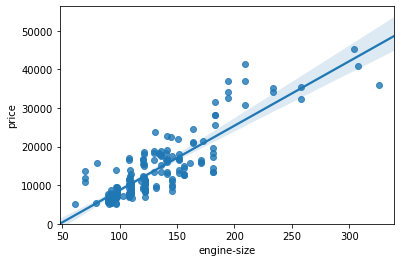

In [802]:
sns.regplot(x='engine-size', y = 'price', data = car)
plt.ylim(0,)

**Let's look at the correlation between engine size and price.**
- This time we'll visualize these two variables using a scatter plot and an added linear line called a regression line, which indicates the relationship between the two.
- The main goal of this plot is to see whether the engine size has any impact on the price.
- In this example, 
    - you can see that the straight line through the data points is very steep which shows that there's a positive linear relationship between the two variables. 
    - With increase in values of engine size, values of price go up as well and the slope of the line is positive.
- So there is a positive correlation between engine size and price.
- We can use seaborn.regplot to create the scatter plot.

## Correlation - Negative Linear Relationship
- correlation between two feature (highway-mpg and price)

(0, 48280.713238589015)

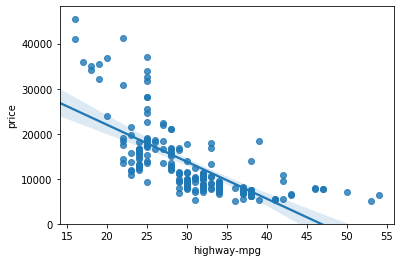

In [803]:
sns.regplot(x='highway-mpg', y = 'price', data = car)
plt.ylim(0,)

As another example, 
- now let's look at the relationship between highway miles per gallon to see its impact on the car price.
- As we can see in this plot, when highway miles per gallon value goes up the value price goes down.
- Therefore there is a negative linear relationship between highway miles per gallon and price.
- Although this relationship is negative the slope of the line is steep which means that the highway miles per gallon is still a good predictor of price.
- These two variables are said to have a negative correlation.


## Correlation - Negative Linear Relationship
- correlation between two feature (peak-rpm and price)

AttributeError: 'str' object has no attribute 'conjugate'

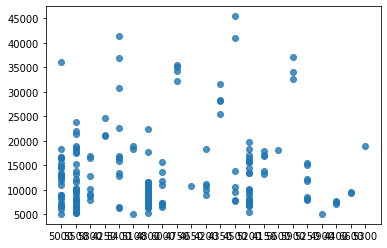

In [810]:
sns.regplot(x='peak-rpm', y = 'price', data = car)
plt.ylim(0,)

- Finally, we have an example of a weak correlation.
- For example, both low peak RPM and high values of peak RPM have low and high prices.
- Therefore, we cannot use RPM to predict the values.

# 5. Correlation - Statistics
Here, we'll introduce you to various correlations statistical methods.

### Pearson correlation

One way to measure the strength of the correlation between continuous numerical variable is by using a method called Pearson correlation.
- Pearson correlation method will give you two values: 
    1. the correlation coefficient and the 
    2. P-value.
- So how do we interpret these values?

**correlation coefficient**
- For the correlation coefficient, 
    - a value close to 1 implies a large positive correlation,
    - while a value close to negative 1 implies a large negative correlation,
    - and a value close to zero implies no correlation between the variables.
    
**P-value**
- Next, the P-value will tell us how certain we are about the correlation that we calculated.
- For the P-value, 
    - a value less than.001 gives us a strong certainty about the correlation coefficient that we calculated.
    - A value between.001 and.05 gives us moderate certainty.
    - A value between.05 and.1 will give us a weak certainty.
    - And a P-value larger than.1 will give us no certainty of correlation at all.
    
**strong correlation**
- We can say that there is a strong correlation when the 
    - correlation coefficient is close to 1 or negative 1,
    - and the P-value is less than.001.

### Pearson correlation Example

In [805]:
car['horsepower'].dtype

dtype('O')

In [806]:
# simply drop whole row with NaN in "price" column
car.dropna(subset=["horsepower"], axis=0, inplace=True)

In [807]:
car[["horsepower"]]= car[["horsepower"]].astype("int")

In [808]:
pearson_coef, p_value = stats.pearsonr(car['horsepower'], car['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8105330821322063  with a P-value of P =  1.1891278276946466e-47


- In this example, we want to look at the correlation between the variable's horsepower and car price.
- See how easy you can calculate the Pearson correlation using the SI/PI stats package?
- We can see that the correlation coefficient is approximately.8, and this is close to 1.
- So there is a strong positive correlation.
- We can also see that the P-value is very small, much smaller than.001.
- And so we can conclude that we are certain about the strong positive correlation.


### Correlation - Heatmap

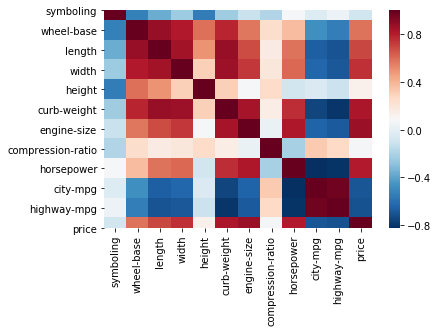

In [809]:
sns.heatmap(car.corr(),cmap= 'RdBu_r')

- Taking all variables into account,
- we can now create a heatmap that indicates the correlation between each of the variables with one another.
- The color scheme indicates the Pearson correlation coefficient, indicating the strength of the correlation between two variables.
- We can see a diagonal line with a dark red color, indicating that all the values on this diagonal are highly correlated.
- This makes sense because when you look closer, the values on the diagonal are the correlation of all variables with themselves, which will be always 1.
- This correlation heatmap gives us a good overview of how the different variables are related to one another and, most importantly, how these variables are related to price.